<a href="https://colab.research.google.com/github/harshsaxena07/Traffic_Symbol_Prediction/blob/main/Road%26trafficsigndetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
if 'COLAB_GPU' in os.environ:
    print("GPU is enabled")
else:
    print("GPU is not enabled")

GPU is enabled


Install the YOLO-8


In [3]:
!pip install ultralytics==8.0.20

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.7 MB/s eta 0:00:00


Check if YOLO-8 hab been installed properly or not

In [4]:
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/107.7 GB disk)


Import Dataset: From Roboflow

In [5]:
%pwd


'/content'

In [7]:
!mkdir RoadSignDetection

mkdir: cannot create directory ‘RoadSignDetection’: File exists


In [8]:
!ls

drive  RoadSignDetection


In [9]:
path = "/content/RoadSignDetection"

In [ ]:
%pwd

'/content'

for changing the directory


In [10]:
os.chdir("/content/RoadSignDetection")

In [11]:
%pwd

'/content/RoadSignDetection'

In [12]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QeqLIVStlCiQ7nEcjBM8")
project = rf.workspace("selfdriving-car-qtywx").project("self-driving-cars-lfjou")
version = project.version(6)
dataset = version.download("yolov8")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Self-Driving-Cars-6 in yolov8:: 100%|██████████| 9950/9950 [00:01<00:00, 6242.38it/s]


Train the YOLOv8 over a Custom Dataset

In [13]:
os.chdir("/content/RoadSignDetection/Self-Driving-Cars-6")

In [14]:
%pwd

'/content/RoadSignDetection/Self-Driving-Cars-6'

In [16]:
!cat /content/RoadSignDetection/Self-Driving-Cars-6/data.yaml


train: /content/RoadSignDetection/Self-Driving-Cars-6/train/images
val: /content/RoadSignDetection/Self-Driving-Cars-6/valid/images
test: /content/RoadSignDetection/Self-Driving-Cars-6/test/images
names:
- Green Light
- Red Light
- Speed Limit 10
- Speed Limit 100
- Speed Limit 110
- Speed Limit 120
- Speed Limit 20
- Speed Limit 30
- Speed Limit 40
- Speed Limit 50
- Speed Limit 60
- Speed Limit 70
- Speed Limit 80
- Speed Limit 90
- Stop
nc: 15


In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/RoadSignDetection/Self-Driving-Cars-6/data.yaml epochs=10 imgsz=640 batch=16


100% 6.23M/6.23M [00:00<00:00, 49.7MB/s]

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.loa

Display some of the content that we obtained

In [ ]:
!ls '/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train4/weights'

best.pt  last.pt


In [ ]:
!ls '/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train4/'

args.yaml					    F1_curve.png  R_curve.png  weights
confusion_matrix.png				    P_curve.png   results.csv
events.out.tfevents.1735870153.2e0594670968.1898.0  PR_curve.png  results.png


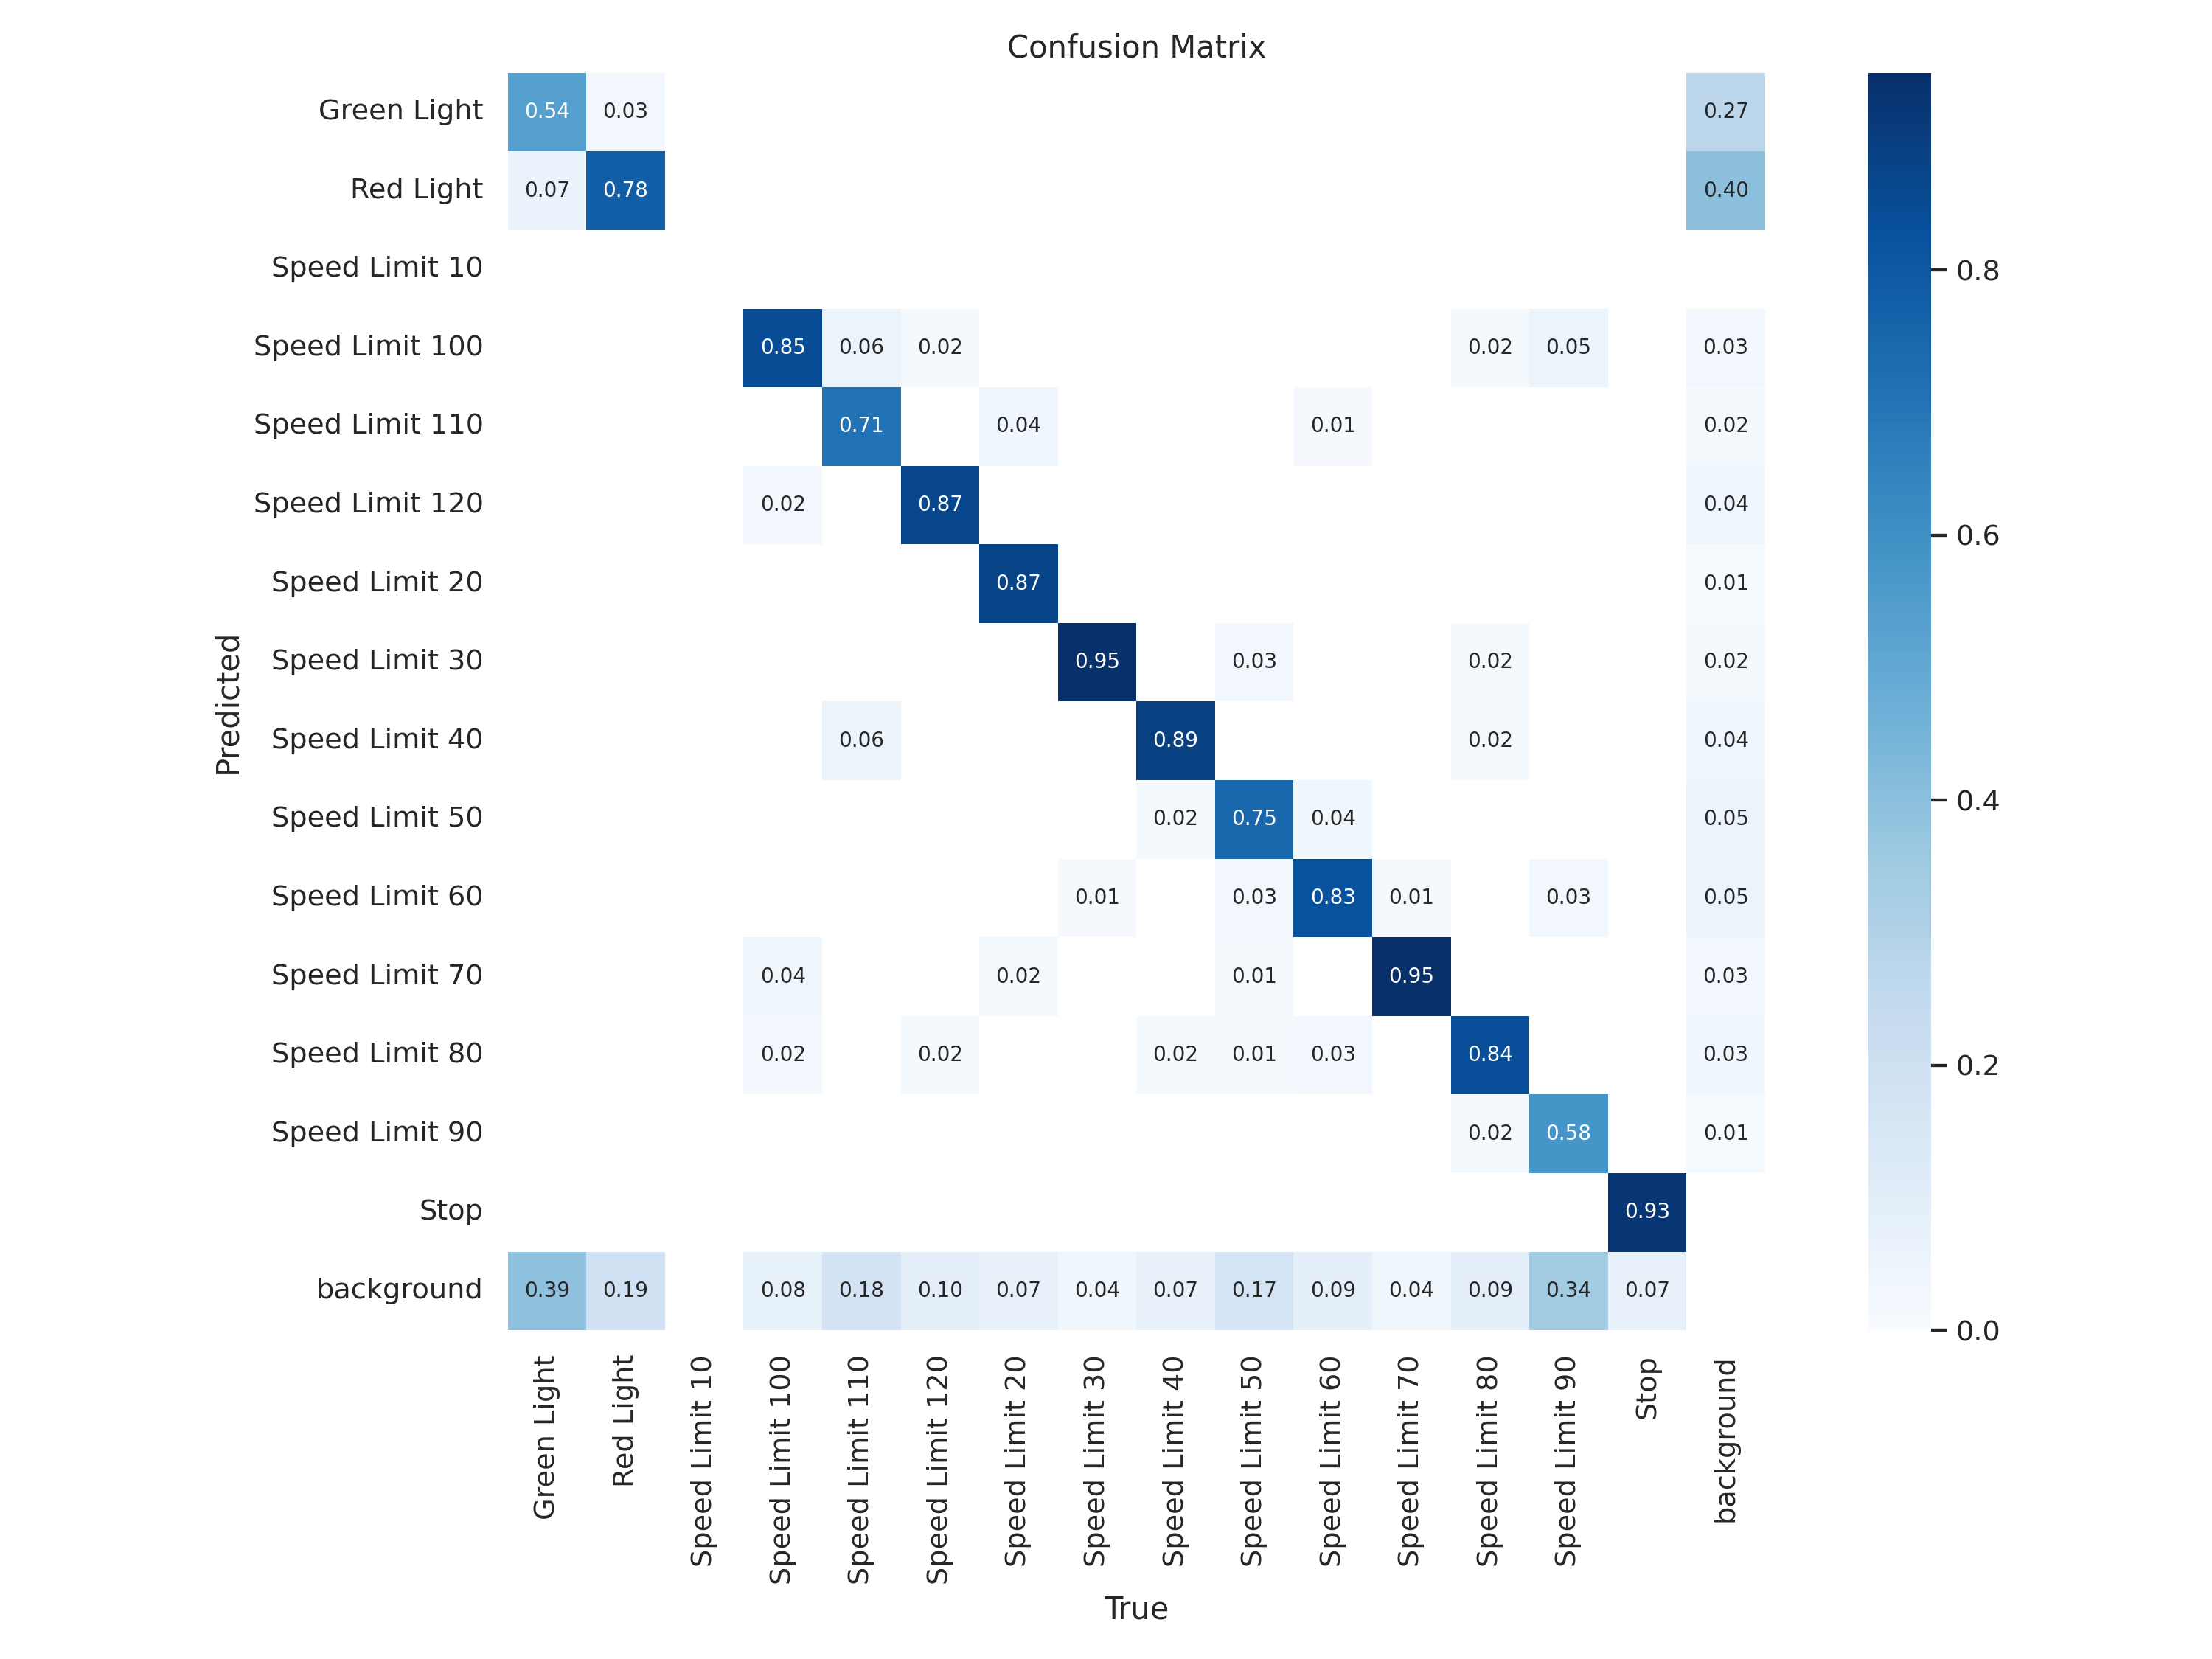

In [ ]:
resultData = "/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train4/"

from IPython.display import Image, display

Image(filename = f'{resultData}confusion_matrix.png')

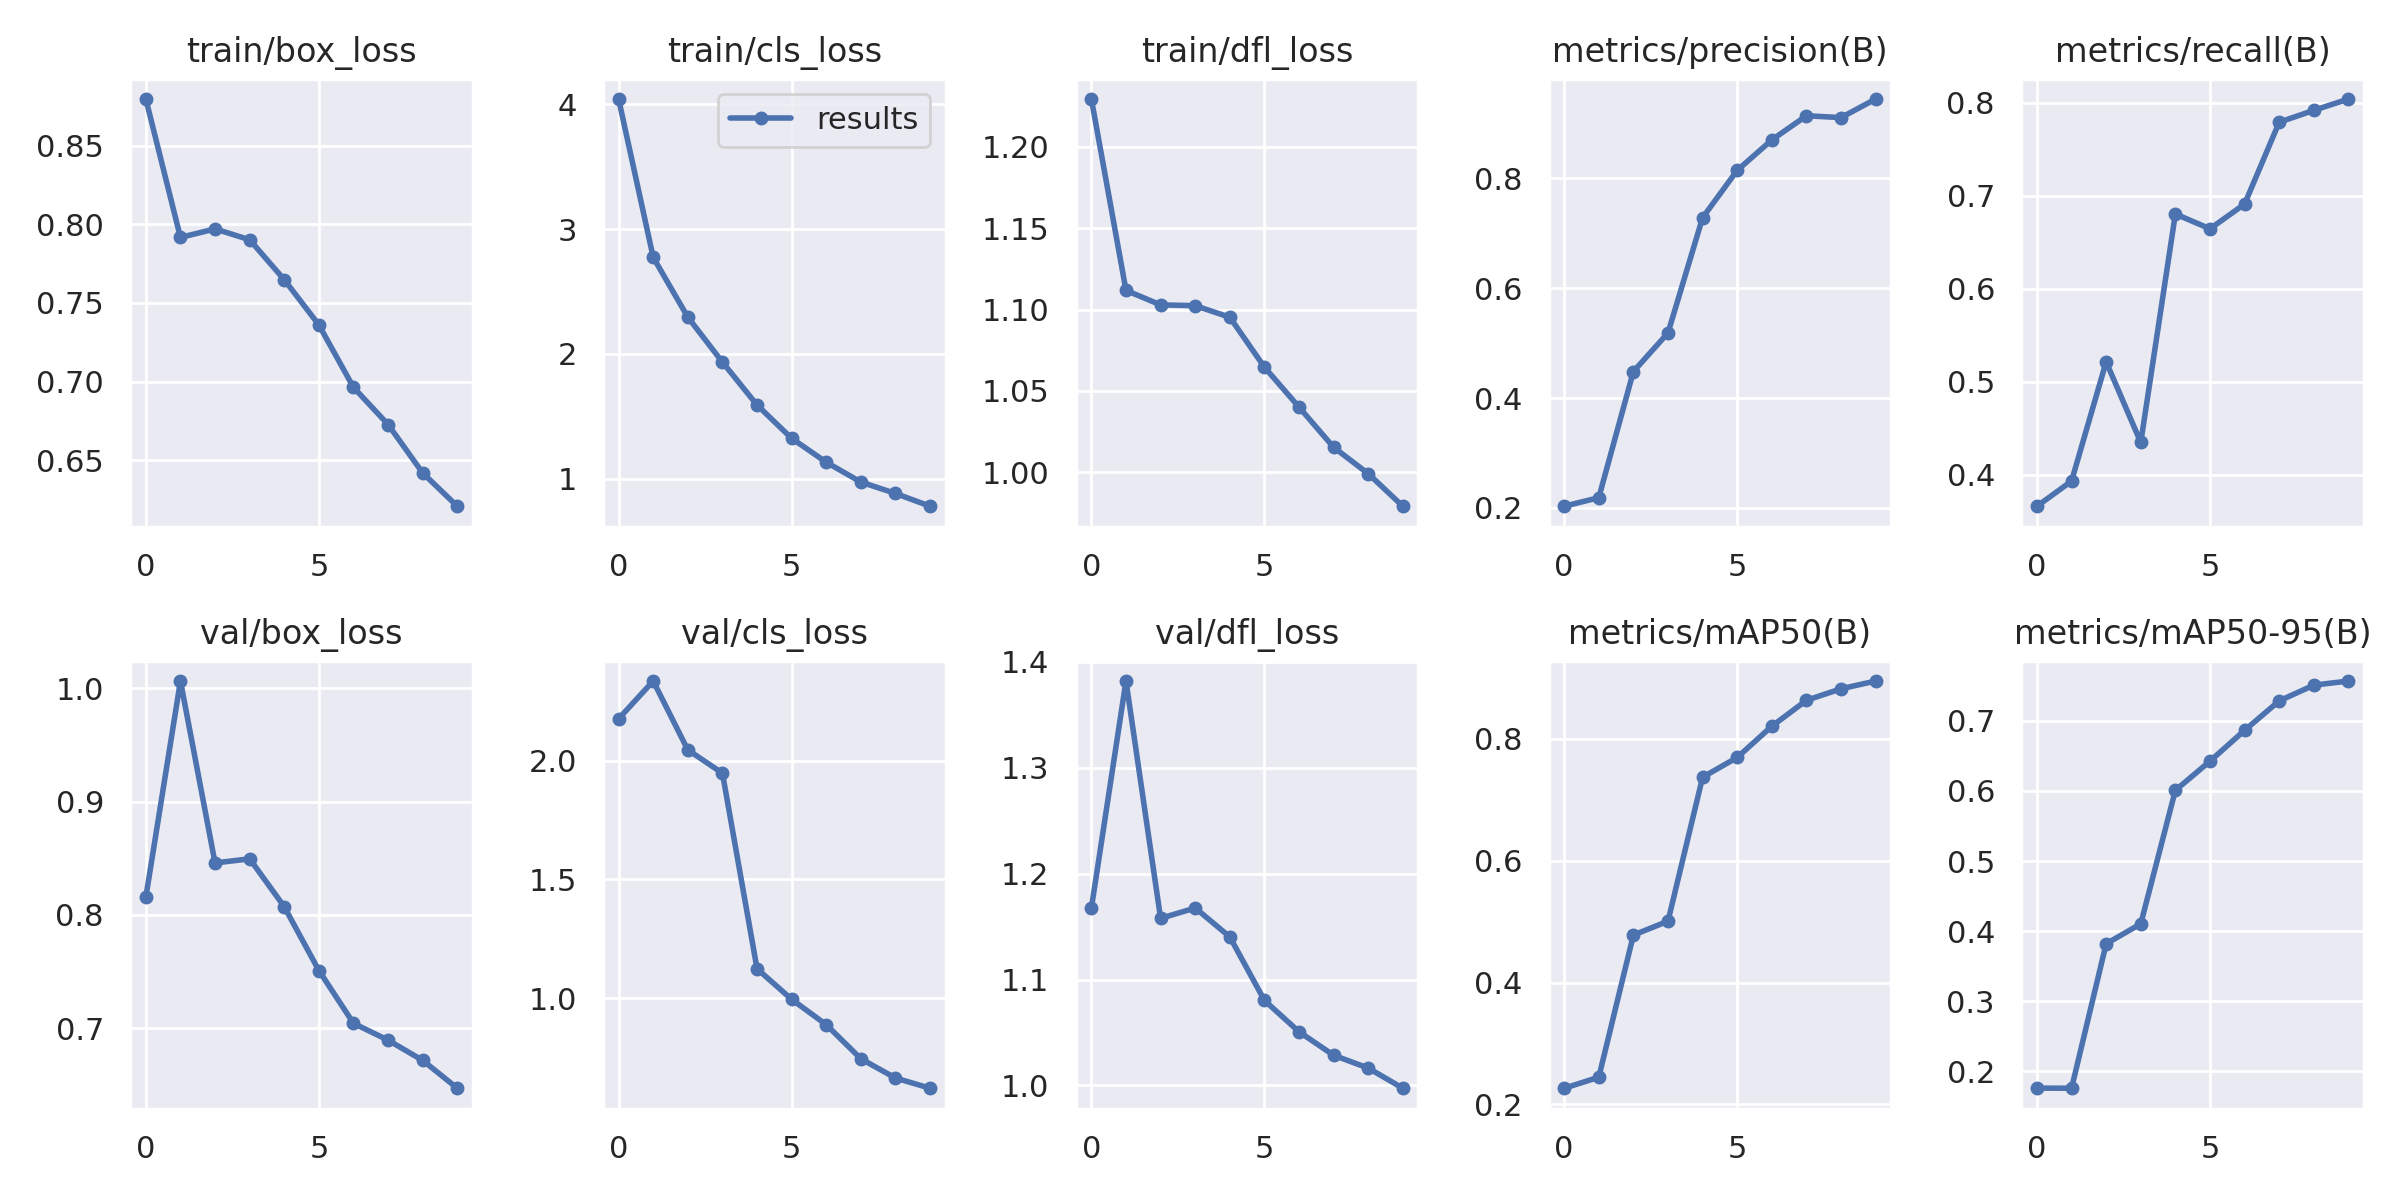

In [ ]:
Image(filename = f'{resultData}results.png')

In [ ]:
import pandas as pd

df = pd.read_csv(f'{resultData}results.csv')

print(df.tail(1))

                  epoch        train/box_loss        train/cls_loss  \
9                     9               0.62059               0.77953   

         train/dfl_loss  metrics/precision(B)  ...          val/cls_loss  \
9               0.97906               0.94374  ...               0.61998   

           val/dfl_loss                lr/pg0                lr/pg1  \
9               0.99737               0.00208               0.00208   

                 lr/pg2  
9               0.00208  

[1 rows x 14 columns]


Testing midel on any aribitary video containing road signs

```

```



In [ ]:
%pwd

'/content/RoadSignDetection/Self-Driving-Cars-6'

In [ ]:
os.chdir("/content")

In [ ]:
%pwd

'/content'

In [ ]:
!mkdir ManualTestingData

In [ ]:
os.chdir("/content/ManualTestingData")

In [ ]:
URL = "https://drive.google.com/file/d/1SBvrvWIQeqPUlduLX83UddZtRviT8vG_/view?usp=sharing"

id = "1SBvrvWIQeqPUlduLX83UddZtRviT8vG_"

!wget --no-check-certificate 'https://docs.google.com/us?export=download&id=1SBvrvWIQeqPUlduLX83UddZtRviT8vG_' -O inputPhoto.jpg

--2025-01-03 03:37:33--  https://docs.google.com/us?export=download&id=1SBvrvWIQeqPUlduLX83UddZtRviT8vG_
Resolving docs.google.com (docs.google.com)... 142.250.141.101, 142.250.141.100, 142.250.141.113, ...
Connecting to docs.google.com (docs.google.com)|142.250.141.101|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-01-03 03:37:33 ERROR 404: Not Found.



In [ ]:
!ls /content/ManualTestingData/


runs  stopsign.jpg


In [ ]:
import os
image_path = '/content/ManualTestingData/stopsign.jpg'
print(os.path.exists(image_path))


True


In [ ]:
weightsPath = "/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train4/weights"

!yolo task=detect mode=predict model={weightsPath}/best.pt conf=0.25 source='/content/ManualTestingData/stopsign.jpg' save = True
